In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

: 

In [206]:
df=pd.read_csv("data.csv")

In [207]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

: 

In [209]:
df.shape

(541909, 8)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [211]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [212]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [213]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [214]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [215]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [216]:
df['Description']=df['Description'].fillna('unknown')

In [217]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [218]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [219]:
df=df.dropna(subset=['CustomerID'])

In [220]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [221]:
df.shape

(406829, 8)

In [222]:
df=df.astype({'CustomerID':int})

In [223]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [224]:
df.duplicated().sum()

5225

In [225]:
df=df.drop_duplicates()

In [226]:
df.duplicated().sum()

0

In [227]:
df.shape

(401604, 8)

In [228]:
df['UnitPrice'].min()

0.0

In [229]:
df['Quantity'].min()

-80995

In [230]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [231]:
df=df[df['Quantity']>0]

In [232]:
df['Quantity'].min()

1

In [233]:
df.shape

(392732, 8)

In [234]:
df['TotalSales']=df['Quantity']*df['UnitPrice']

In [235]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [236]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')

In [237]:
df['TotalSales'].max()

168469.6

In [238]:
df['TotalSales'].min()

0.0

In [239]:
df.shape

(392732, 9)

In [240]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,392732.000000,392732,392732.000000,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,22.629195
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.390000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,181.588420,NaN,22.240725,1713.567773,311.083465


In [241]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [242]:
df.Country.nunique()

37

In [243]:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
TotalSales      2940
dtype: int64

In [244]:
df.Country.value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [245]:
Country_wise_TS=df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
Country_wise_TS.head(10)

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalSales, dtype: float64

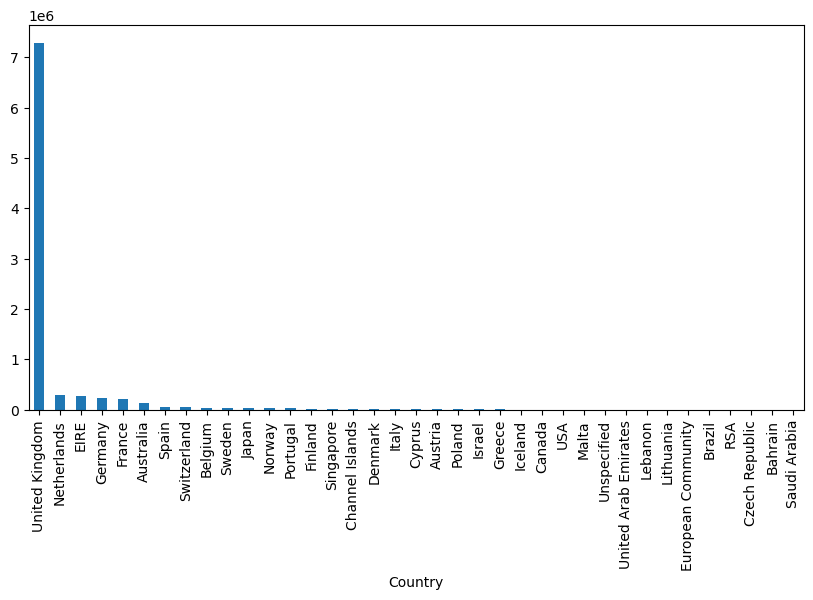

In [246]:
top_sales=Country_wise_TS[:10]
Country_wise_TS.plot.bar(figsize=(10,5))
plt.show()

In [247]:
avg_sales=df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
avg_sales.head(10)

Country
Netherlands    120.798282
Australia      116.937340
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
Denmark         49.882474
Lithuania       47.458857
Lebanon         37.641778
EIRE            36.699289
Brazil          35.737500
Name: TotalSales, dtype: float64

In [248]:
customer=df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
customer.head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalSales, dtype: float64

In [253]:
top_10=customer[:10]

<Axes: xlabel='CustomerID'>

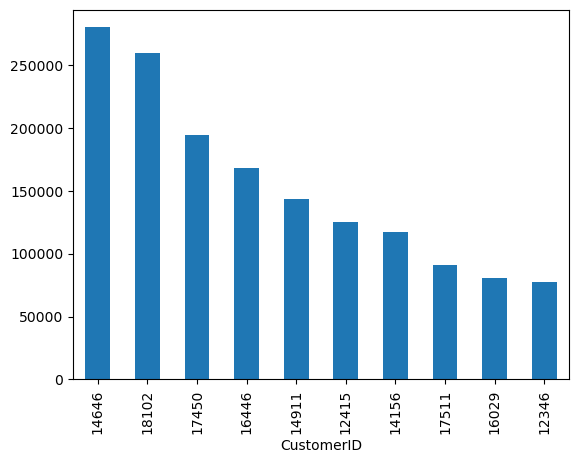

In [254]:
top_10.plot(kind='bar')

In [256]:
bulk_quantity=df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)
bulk_quantity.head(10)

CustomerID
14646    197491
16446     80997
14911     80490
12415     77670
12346     74215
17450     69973
17511     64549
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int64

<Axes: xlabel='CustomerID'>

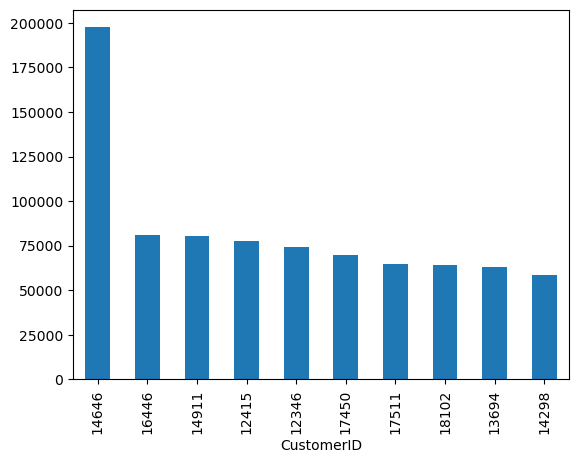

In [257]:
top_10=bulk_quantity[:10]
top_10.plot(kind='bar')

In [262]:
most_purchased=df.groupby(['CustomerID','Description'])['Quantity'].sum().sort_values(ascending=False)
most_purchased.head(10)

CustomerID  Description                      
16446       PAPER CRAFT , LITTLE BIRDIE          80995
12346       MEDIUM CERAMIC TOP STORAGE JAR       74215
13256       ASSTD DESIGN 3D PAPER STICKERS       12540
16422       BROCADE RING PURSE                   10080
16333       WORLD WAR 2 GLIDERS ASSTD DESIGNS    10080
17949       POPCORN HOLDER                        9292
16333       RED  HARMONICA IN BOX                 8120
16308       SMALL CHINESE STYLE SCISSOR           8000
12901       WORLD WAR 2 GLIDERS ASSTD DESIGNS     6768
17306       PACK OF 12 LONDON TISSUES             6624
Name: Quantity, dtype: int64

<Axes: xlabel='Country', ylabel='TotalSales'>

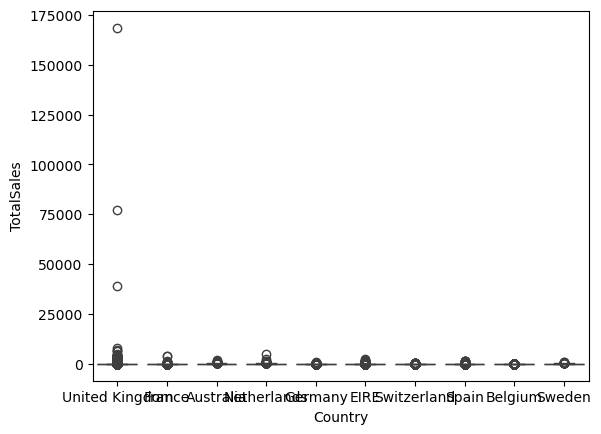

In [272]:

top10 = df.groupby('Country')['TotalSales'].sum().nlargest(10).index

filtered_df = df[df['Country'].isin(top10)]

sns.boxplot(data=filtered_df, x='Country', y='TotalSales')
